# Pregled in analiza najbolj popularnih pesmi leta 2018


In [176]:
import pandas as pd
%matplotlib inline

pd.options.display.max_rows = 20
pesmi = pd.read_csv('videne.csv',index_col = 'id').drop(columns = 'mesto_na_lestvici')
pesmi['feats'] = 1 + pesmi['ime_izvajalca'].str.count('Featuring') + pesmi['ime_izvajalca'].str.count(',') + pesmi['ime_izvajalca'].str.count('&')
pesmi['wrdz'] = 1 + pesmi['naslov_pesmi'].str.count(' ')
pesmi['ltrz'] = pesmi['naslov_pesmi'].str.len()

In [177]:
pesmi

,ime_izvajalca,naslov_pesmi,tednov_na_lestvici,najvišje_mesto,tednov,povp_mesto,feats,wrdz,ltrz
id,,,,,,,,,
0,Ed Sheeran,Perfect,57,1,40,12.000000,1,1,7
1,Post Malone Featuring 21 Savage,Rockstar,41,1,27,15.370370,2,1,8
2,Camila Cabello Featuring Young Thug,Havana,46,2,27,14.555556,2,1,6
3,G-Eazy Featuring A$AP Rocky & Cardi B,No Limit,29,4,14,21.285714,3,2,8
4,Imagine Dragons,Thunder,52,4,18,18.111111,1,1,7
...,...,...,...,...,...,...,...,...,...
699,Kodak Black,Testimony,1,74,1,74.000000,1,1,9
700,Ava Max,Sweet But Psycho,1,87,1,87.000000,1,3,16
701,Kodak Black Featuring Lil Pump,Gnarly,1,88,1,88.000000,2,1,6


In [143]:
pesmi[(pesmi.najvišje_mesto >= 90)& (pesmi.tednov_na_lestvici >=10)].sort_values('id')

,ime_izvajalca,naslov_pesmi,tednov_na_lestvici,najvišje_mesto,tednov,povp_mesto,feats,wrdz
id,,,,,,,,
93,Migos,Stir Fry,21,94,21,33.809524,1,2
96,Kelsea Ballerini,Legends,12,97,9,82.777778,1,1
108,Chris Stapleton,Broken Halos,20,90,15,66.533333,1,2
120,P!nk,Beautiful Trauma,15,95,13,88.615385,1,2
121,Lil Skies Featuring Landon Cube,Red Roses,20,98,20,83.200000,2,2
...,...,...,...,...,...,...,...,...
525,Dan + Shay,Speechless,15,95,15,55.933333,1,1
534,Flipp Dinero,Leave Me Alone,14,96,14,55.500000,1,3
535,Jimmie Allen,Best Shot,14,97,14,64.714286,1,2


<AxesSubplot:xlabel='wrdz'>

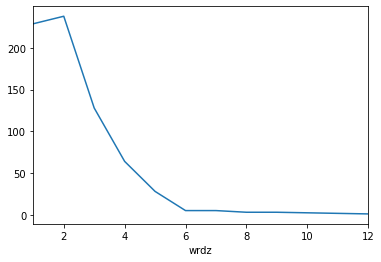

In [194]:
pesmi.groupby('wrdz').size().plot()

<AxesSubplot:xlabel='ltrz', ylabel='tednov_na_lestvici'>

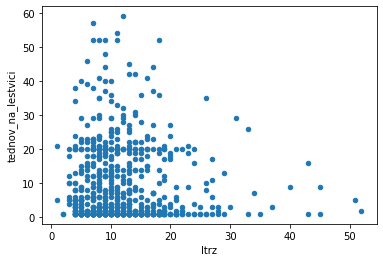

In [195]:
pesmi.plot(x='ltrz',y='tednov_na_lestvici',kind='scatter')

<AxesSubplot:xlabel='ltrz'>

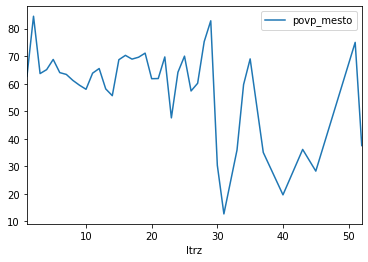

In [183]:
pesmi.groupby('ltrz').mean().plot(y='povp_mesto')

In [15]:
pesmi.groupby('ime_izvajalca').size().sort_values()

ime_izvajalca
2 Chainz Featuring YG & Offset     1
Meek Mill Featuring Cardi B        1
Meek Mill Featuring 21 Savage      1
Mason Ramsey                       1
Martin Garrix Featuring Khalid     1
                                  ..
Lil Wayne                         13
Post Malone                       14
XXXTENTACION                      17
Travis Scott                      17
Drake                             23
Length: 447, dtype: int64

In [171]:
pesmi.groupby('ime_izvajalca').agg({'tednov_na_lestvici':[max,sum],'najvišje_mesto':min})

tednov_na_lestvici     najvišje_mesto
                                              max sum            min
ime_izvajalca                                                       
2 Chainz Featuring YG & Offset                  2   2             96
2 Chainz, Drake & Quavo                         2   2             53
21 Savage                                      29  29             12
5 Seconds Of Summer                            29  30             61
6LACK Featuring J. Cole                         1   1             76
...                                           ...  ..            ...
Zedd & Elley Duhe                               1   1             90
Zedd, Maren Morris & Grey                      40  40             23
benny blanco, Halsey & Khalid                  23  23             56
lovelytheband                                  22  22             84
twenty one pilots                               4   7             60

[447 rows x 3 columns]

<AxesSubplot:xlabel='feats'>

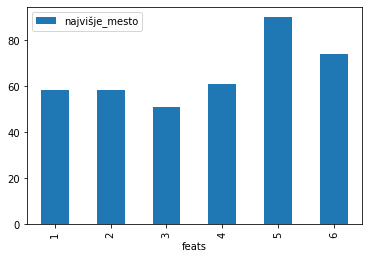

In [160]:
pesmi.groupby('feats').mean().plot(y='najvišje_mesto', kind='bar')

<AxesSubplot:xlabel='feats'>

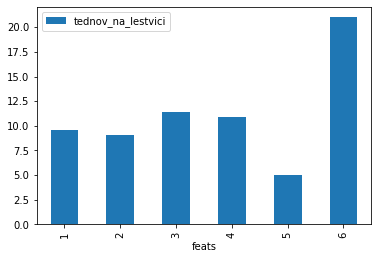

In [199]:
pesmi.groupby('feats').mean().plot(y='tednov_na_lestvici', kind='bar')

<AxesSubplot:xlabel='tednov_na_lestvici', ylabel='najvišje_mesto'>

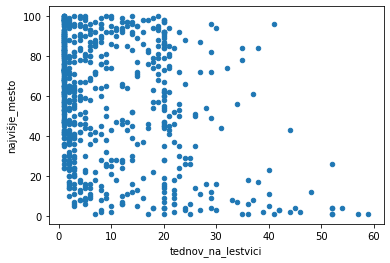

In [100]:
pesmi.plot(x='tednov_na_lestvici', y='najvišje_mesto', kind= 'scatter')

<AxesSubplot:xlabel='povp_mesto', ylabel='najvišje_mesto'>

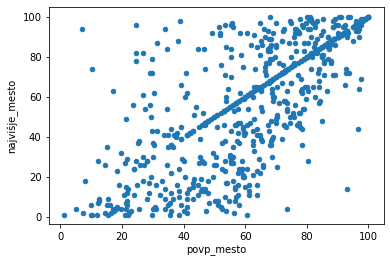

In [151]:
pesmi.plot(x='povp_mesto', y='najvišje_mesto', kind= 'scatter')

<AxesSubplot:xlabel='feats'>

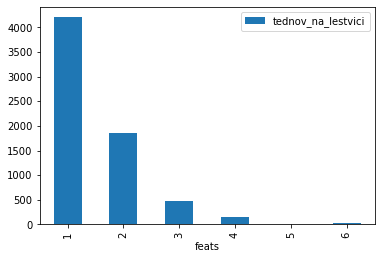

In [201]:
pesmi.groupby('feats').sum().plot(y='tednov_na_lestvici',kind='bar')

<AxesSubplot:xlabel='wrdz'>

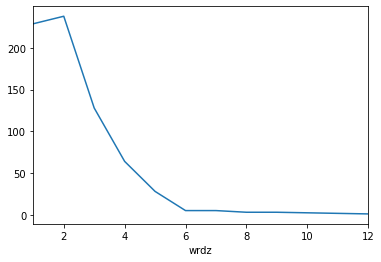

In [210]:
pesmi.groupby('wrdz').size().plot()

<AxesSubplot:xlabel='wrdz'>

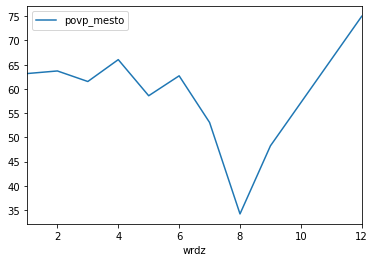

In [211]:
pesmi.groupby('wrdz').mean().plot(y='povp_mesto')

<AxesSubplot:xlabel='ltrz', ylabel='tednov_na_lestvici'>

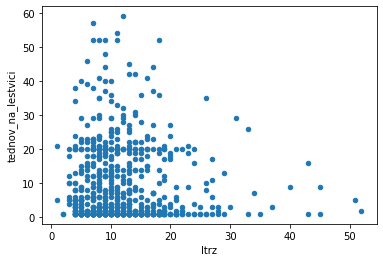

In [219]:
pesmi.plot(x='ltrz',y='tednov_na_lestvici',kind='scatter')

<AxesSubplot:xlabel='feats'>

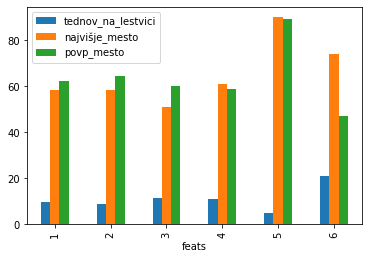

In [208]:
pesmi.groupby('feats').mean().plot(y=['tednov_na_lestvici','najvišje_mesto','povp_mesto'],kind='bar')